In [1]:
import json
import pandas as pd
from pathlib import Path
from pprint import pprint
import datetime
import time
import numpy as np
import matplotlib as plt

import pandas
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

%matplotlib inline

In [2]:
#path_results = Path('/media/discoD/models/elmo/ner/results_20_epochs_ibm')
#path_results = Path('/media/discoD/models/elmo/ner/results_1_epoch_harem_all_combinations')
#path_results = Path('/opt/models/elmo/ner/results (pre queda energia, datalawyer)')
# path_results = Path('/media/discoD/models/elmo/ner/results_embeddings_glove/')
path_results = Path('/media/discoD/models/elmo/ner/results_embeddings/')

In [3]:
for folder in path_results.iterdir():
    print(folder)

/media/discoD/models/elmo/ner/results_embeddings/datalawyer_Embeddings


In [4]:
configs = dict()
metrics = dict()
for folder in path_results.iterdir():
    results_model_folder = folder.iterdir()
    for training_folder in results_model_folder:
        #print('Reading files from %s' % training_folder.name)
        has_metrics = False
        for results_file in training_folder.iterdir():
            if results_file.name.endswith('.json'):
                #print('Parsing data from %s' % results_file.name)
                if results_file.name.startswith('config'):
                    configs[training_folder.name] = json.loads(results_file.read_bytes())
                elif results_file.name.startswith('metrics.'):
                    metrics[training_folder.name] = json.loads(results_file.read_bytes())
                    has_metrics = True
        if not has_metrics:
            print('"%s"' % training_folder.name)
            del configs[training_folder.name]
print(len(metrics))
print(len(configs))

"datalawyer_Embeddings_glove-lc_jur_10B-jur2vec-nilc-brwac_win-15_s300_0"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_1"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_2"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_3"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_4"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_5"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_6"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_7"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_8"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_9"
"datalawyer_Embeddings_wang2vec-lc_jur_cbow_5B-jur2vec-nilc-1_s100_0"
"datalawyer_Embeddings_wang2vec-lc_jur_skip_5B-jur2vec-nilc-1_s100_0"
"datalawyer_Embeddings_wang2vec-lc_jur_skip_5B-jur2vec-nilc-1_s100_1"
"datalawyer_Embeddings_wang2vec-lc_jur_skip_5B-jur2vec-nilc-1_s100_2"
"datalawyer_Embe

In [5]:
def get_seconds(time_str):
    x = time.strptime(time_str.split('.')[0],'%H:%M:%S')
    return datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
def get_average_epoch_duration(metrics):
    seconds = get_seconds(metrics['training_duration'])
    training_epochs = metrics['training_epochs'] + 1
    return seconds / training_epochs

In [6]:
TRAINING_ID = 'Training_ID'
SCENARIO = 'Scenario'
MODEL = 'Model'
REPRESENTATION = 'Representation'
EMBEDDING = 'Embedding'
EMBEDDING_TYPE = 'Embedding_Type'
CORPUS_TYPE = 'Corpus_Type'
DOMAIN_SPECIFIC = 'Domain_Specific'
DIMENSION = 'Dimension'
EMBEDDING_DIMENSION = 'Embedding_Dimension'
BATCH_SIZE = 'Batch_Size'
ELMO_DROPOUT = 'ELMo_Dropout'
TRAINING_NUMBER = 'Training_Number'
EXECUTION_NUMBER = 'Execution_Number'
BEST_EPOCH = 'Best_Epoch'
TRAINING_EPOCHS = 'Training_Epochs'
TRAINING_DURATION = 'Training_Duration'
TOTAL_DURATION = 'Total_Duration(s)'
AVERAGE_EPOCH_DURATION = 'Average_Epoch_Duration(s)'
TRAINING_ACCURACY = 'Training_Accuracy'
TRAINING_ACCURACY_TOP3 = 'Training_Accuracy_Top-3'
TRAINING_PRECISION = 'Training_Precision'
TRAINING_RECALL = 'Training_Recall'
TRAINING_F1_MEASURE = 'Training_F1-Measure'
TRAINING_LOSS = 'Training_Loss'
BEST_VALIDATION_ACCURACY = 'Best_Validation_Accuracy'
BEST_VALIDATION_ACCURACY_TOP3 = 'Best_Validation_Accuracy_Top-3'
BEST_VALIDATION_PRECISION = 'Best_Validation_Precision'
BEST_VALIDATION_RECALL = 'Best_Validation_Recall'
BEST_VALIDATION_F1_MEASURE = 'Best_Validation_F1-Measure'
BEST_VALIDATION_LOSS = 'Best_Validation_Loss'
TEST_ACCURACY = 'Test_Accuracy'
TEST_ACCURACY_TOP3 = 'Test_Accuracy_Top-3'
TEST_PRECISION = 'Test_Precision'
TEST_RECALL = 'Test_Recall'
TEST_F1_MEASURE = 'Test_F1_Measure'
TEST_LOSS = 'Test_Loss'
columns = [TRAINING_ID, MODEL, REPRESENTATION, EMBEDDING, CORPUS_TYPE, EMBEDDING_TYPE, DOMAIN_SPECIFIC, DIMENSION, EMBEDDING_DIMENSION, EXECUTION_NUMBER, BEST_EPOCH, TRAINING_EPOCHS, TRAINING_DURATION, TOTAL_DURATION, AVERAGE_EPOCH_DURATION, TRAINING_ACCURACY, TRAINING_ACCURACY_TOP3, TRAINING_PRECISION, TRAINING_RECALL, TRAINING_F1_MEASURE, TRAINING_LOSS, BEST_VALIDATION_ACCURACY, BEST_VALIDATION_ACCURACY_TOP3, BEST_VALIDATION_PRECISION, BEST_VALIDATION_RECALL, BEST_VALIDATION_F1_MEASURE, BEST_VALIDATION_LOSS, TEST_ACCURACY, TEST_ACCURACY_TOP3, TEST_PRECISION, TEST_RECALL, TEST_F1_MEASURE, TEST_LOSS]
columns

['Training_ID',
 'Model',
 'Representation',
 'Embedding',
 'Corpus_Type',
 'Embedding_Type',
 'Domain_Specific',
 'Dimension',
 'Embedding_Dimension',
 'Execution_Number',
 'Best_Epoch',
 'Training_Epochs',
 'Training_Duration',
 'Total_Duration(s)',
 'Average_Epoch_Duration(s)',
 'Training_Accuracy',
 'Training_Accuracy_Top-3',
 'Training_Precision',
 'Training_Recall',
 'Training_F1-Measure',
 'Training_Loss',
 'Best_Validation_Accuracy',
 'Best_Validation_Accuracy_Top-3',
 'Best_Validation_Precision',
 'Best_Validation_Recall',
 'Best_Validation_F1-Measure',
 'Best_Validation_Loss',
 'Test_Accuracy',
 'Test_Accuracy_Top-3',
 'Test_Precision',
 'Test_Recall',
 'Test_F1_Measure',
 'Test_Loss']

In [7]:
def get_training_data_from_id(training_id, config):
    data = training_id.split('_')
    print(data)
    embedding = data[2]
    
    if embedding.startswith('glove'):
        
        if len(data) == 5:
            return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: 'No', 
                    DOMAIN_SPECIFIC: False, DIMENSION: data[3][-3:], EXECUTION_NUMBER: data[4],
                    CORPUS_TYPE: 'Nilc'}
        elif len(data) == 7:
            return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: 'No', 
                    DOMAIN_SPECIFIC: True, DIMENSION: data[5][-3:], EXECUTION_NUMBER: data[6],
                    CORPUS_TYPE: data[4]}
        elif len(data) == 8:
            return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: 'No', 
                    DOMAIN_SPECIFIC: True, DIMENSION: data[6][-3:], EXECUTION_NUMBER: data[7],
                    CORPUS_TYPE: data[4]}
        else:
            print('Check id: %s' % training_id)
        
    elif embedding.startswith('wang'):
            
        if len(data) == 6:
            return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: data[3], 
                    DOMAIN_SPECIFIC: False, DIMENSION: data[4][-3:], EXECUTION_NUMBER: data[5], 
                    CORPUS_TYPE: 'Nilc'}
#         elif len(data) == 7:
#             return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: data[4], 
#                     DOMAIN_SPECIFIC: True, DIMENSION: data[5][-3:], EXECUTION_NUMBER: data[6],
#                     CORPUS_TYPE: data[4]}
        elif len(data) == 8:
            return {MODEL: data[0], REPRESENTATION: data[1], EMBEDDING: data[2], EMBEDDING_TYPE: data[4], 
                    DOMAIN_SPECIFIC: True, DIMENSION: data[6][-3:], EXECUTION_NUMBER: data[7],
                    CORPUS_TYPE: data[5]}
        else:
            print('Check id: %s' % training_id)
            

In [8]:
training_data = []
for training_id, config in configs.items():
    training_metrics = metrics[training_id]
    data = get_training_data_from_id(training_id, config)
    if '-lc' in data[EMBEDDING]:
        data[EMBEDDING] = data[EMBEDDING].replace('-lc', '')
        data[DOMAIN_SPECIFIC] = True
    data[EMBEDDING_DIMENSION] = data[EMBEDDING_TYPE] + '_' + data[DIMENSION]
    data[DOMAIN_SPECIFIC] = 'Sim' if data[DOMAIN_SPECIFIC] else 'Não'
    data[TRAINING_ID] = training_id
    data[BEST_EPOCH] = training_metrics['best_epoch'] if training_metrics else None
    data[TRAINING_EPOCHS] = training_metrics['training_epochs'] + 1 if training_metrics else None
    data[TRAINING_DURATION] = training_metrics['training_duration'] if training_metrics else None
    data[TOTAL_DURATION] = get_seconds(training_metrics['training_duration']) if training_metrics else None
    data[AVERAGE_EPOCH_DURATION] = get_average_epoch_duration(training_metrics) if training_metrics else None
    data[TRAINING_ACCURACY] = training_metrics['training_accuracy'] if training_metrics else None
    data[TRAINING_ACCURACY_TOP3] = training_metrics['training_accuracy3'] if training_metrics else None
    data[TRAINING_PRECISION] = training_metrics['training_precision-overall'] if training_metrics else None
    data[TRAINING_RECALL] = training_metrics['training_recall-overall'] if training_metrics else None
    data[TRAINING_F1_MEASURE] = training_metrics['training_f1-measure-overall'] if training_metrics else None
    data[TRAINING_LOSS] = training_metrics['training_loss'] if training_metrics else None
    data[BEST_VALIDATION_ACCURACY] = training_metrics['best_validation_accuracy'] if training_metrics else None
    data[BEST_VALIDATION_ACCURACY_TOP3] = training_metrics['best_validation_accuracy3'] if training_metrics else None
    data[BEST_VALIDATION_PRECISION] = training_metrics['best_validation_precision-overall'] if training_metrics else None
    data[BEST_VALIDATION_RECALL] = training_metrics['best_validation_recall-overall'] if training_metrics else None
    data[BEST_VALIDATION_F1_MEASURE] = training_metrics['best_validation_f1-measure-overall'] if training_metrics else None
    data[BEST_VALIDATION_LOSS] = training_metrics['best_validation_loss'] if training_metrics else None
    data[TEST_ACCURACY] = training_metrics['test_accuracy'] if training_metrics else None
    data[TEST_ACCURACY_TOP3] = training_metrics['test_accuracy3'] if training_metrics else None
    data[TEST_PRECISION] = training_metrics['test_precision-overall'] if training_metrics else None
    data[TEST_RECALL] = training_metrics['test_recall-overall'] if training_metrics else None
    data[TEST_F1_MEASURE] = training_metrics['test_f1-measure-overall'] if training_metrics else None
    data[TEST_LOSS] = training_metrics['test_loss'] if training_metrics else None
    training_data.append(data)

['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '0']
['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '1']
['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '2']
['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '3']
['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '4']
['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '5']
['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '6']
['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '7']
['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '8']
['datalawyer', 'Embeddings', 'glove-lc', 'jur', '10B-jur2vec-nilc-brwac', 'win-15', 's100', '9']
['datalawyer', 'Embeddings', '

In [9]:
pd.set_option('display.max_columns', 1000)
training_data_df = pd.DataFrame(training_data, columns=columns)
#training_data_df = training_data_df[(training_data_df[EXECUTION_NUMBER]).astype(int) < 1]
training_data_df

,Training_ID,Model,Representation,Embedding,Corpus_Type,Embedding_Type,Domain_Specific,Dimension,Embedding_Dimension,Execution_Number,Best_Epoch,Training_Epochs,Training_Duration,Total_Duration(s),Average_Epoch_Duration(s),Training_Accuracy,Training_Accuracy_Top-3,Training_Precision,Training_Recall,Training_F1-Measure,Training_Loss,Best_Validation_Accuracy,Best_Validation_Accuracy_Top-3,Best_Validation_Precision,Best_Validation_Recall,Best_Validation_F1-Measure,Best_Validation_Loss,Test_Accuracy,Test_Accuracy_Top-3,Test_Precision,Test_Recall,Test_F1_Measure,Test_Loss
0,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,0,9,10,0:10:44.663940,644.0,64.4,0.985914,0.986612,0.859324,0.821022,0.839737,147.648459,0.983891,0.984222,0.856445,0.858541,0.857492,166.348802,0.982277,0.982727,0.839506,0.835637,0.837567,197.776678
1,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,1,9,10,0:09:42.159256,582.0,58.2,0.985791,0.986468,0.859238,0.821137,0.839756,149.233362,0.985077,0.985394,0.865954,0.872736,0.869332,166.727325,0.982164,0.982614,0.840267,0.837686,0.838974,196.460318
2,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,2,9,10,0:09:31.547346,571.0,57.1,0.985825,0.986523,0.859518,0.819529,0.839047,148.109260,0.984663,0.984966,0.861800,0.866862,0.864324,166.866956,0.982502,0.982952,0.841270,0.841270,0.841270,197.828562
3,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,3,9,10,0:09:29.809030,569.0,56.9,0.985935,0.986639,0.863040,0.823779,0.842953,147.931321,0.984608,0.984925,0.863194,0.867841,0.865511,169.248191,0.982417,0.982854,0.841457,0.839734,0.840595,198.699689
4,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,4,9,10,0:09:37.045420,577.0,57.7,0.985727,0.986428,0.859431,0.819644,0.839066,148.521140,0.984815,0.985118,0.861902,0.873715,0.867769,166.624997,0.982558,0.982995,0.844581,0.845878,0.845229,196.442882
5,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,5,9,10,0:09:30.231251,570.0,57.0,0.985923,0.986624,0.861696,0.823090,0.841951,148.205992,0.985104,0.985449,0.870905,0.871757,0.871331,166.399473,0.982488,0.982910,0.843558,0.844854,0.844206,196.235515
6,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,6,9,10,0:09:56.014517,596.0,59.6,0.985675,0.986379,0.861225,0.820563,0.840402,148.279478,0.984746,0.985077,0.862659,0.863926,0.863292,167.029421,0.982333,0.982812,0.840535,0.836662,0.838594,198.392257
7,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,7,9,10,0:09:36.339413,576.0,57.6,0.985947,0.986627,0.860048,0.821022,0.840082,148.561855,0.984842,0.985173,0.864786,0.870289,0.867529,165.980963,0.982502,0.982952,0.839039,0.840758,0.839898,197.047565
8,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,8,9,10,0:10:59.887828,659.0,65.9,0.985895,0.986572,0.860717,0.822056,0.840942,149.054999,0.984994,0.985339,0.867611,0.869310,0.868460,165.763174,0.982431,0.982882,0.842593,0.838710,0.840647,198.047965
9,datalawyer_Embeddings_glove-lc_jur_10B-jur2vec...,datalawyer,Embeddings,glove,10B-jur2vec-nilc-brwac,No,Sim,100,No_100,9,9,10,0:09:36.907457,576.0,57.6,0.985837,0.986544,0.861118,0.821252,0.840713,148.372242,0.984373,0.984704,0.863415,0.866373,0.864891,166.321980,0.982319,0.982755,0.842132,0.841270,0.841701,197.919408


In [10]:
training_data_df.to_csv('training_data_10_epochs_embeddings_datalawyer.csv', index=None)

In [11]:
str(datetime.timedelta(seconds=training_data_df[TOTAL_DURATION].mean()))

'0:09:44.452703'

In [12]:
default_exported_columns = ['mean', 'min', 'max', 'std']
renamed_columns = ['Contagem', 'F-Score', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo']
exported_columns_names = ['F-Score', 'Mínimo', 'Máximo', 'Desvio Padrão']
model_map = {'datalawyer-ft': 'Sim', 'datalawyer': 'Não', 'datalawyer-pt': 'Geral'}
representation_map = {'ELMo+CNN+Embeddings': 'ELMo+CNN+Vetor', 'ELMo+Embeddings': 'ELMo+Vetor', 'ELMo-pt+CNN+Embeddings': 'ELMo+CNN+Vetor', 'ELMo-pt+Embeddings': 'ELMo+Vetor', 'ELMo-pt': 'ELMo', 'ELMo-pt+CNN': 'ELMo+CNN'}
embedding_type_map = {'skip': 'Skip-Gram', 'No': 'Sem Tipo', 'cbow': 'CBoW'}
embedding_map = {'wang2vec': 'Wang2Vec', 'glove': 'GloVe', 'word2vec': 'Word2Vec', 'No': 'Sem Vetor', 'fasttext': 'FastText', 'wang2vec-lc': 'Wang2Vec', 'glove-lc': 'GloVe', 'word2vec-lc': 'Word2Vec', 'fasttext-lc': 'FastText'}
replacements_map = {**model_map, **representation_map, **embedding_type_map, **embedding_map}

def get_group_csv(index_names, group_name, group_columns, target_value, index_map, dataframe=training_data_df, exported_columns=default_exported_columns):
    dataframe = dataframe.rename(index={'ELMo-pt+CNN+Embeddings': 'ELMo+CNN+Vetor', 'ELMo-pt+Embeddings': 'ELMo+Vetor', 'ELMo-pt': 'ELMo', 'ELMo-pt+CNN': 'ELMo+CNN'})
    if type(index_names) == str:
        index_names = [index_names]
    group = dataframe.groupby(group_columns).describe()[target_value].sort_values(by='mean', ascending=False)
    for column in exported_columns:
        group[column] = group[column] * 100
    group.index.names = index_names
    group = group.rename(index=index_map)
    group.columns = renamed_columns
    group.to_csv('grupo_' + group_name + '_10_epochs_embeddings_datalawyer.csv', columns=exported_columns_names, float_format = '%.2f%%')
    return group

In [13]:
get_group_csv('Ajuste Fino', DOMAIN_SPECIFIC, DOMAIN_SPECIFIC, TEST_F1_MEASURE, model_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Ajuste Fino,,,,,,,,
Sim,99.0,84.856116,1.174958,82.678387,0.838569,0.851272,0.858684,86.925250
Não,49.0,84.553086,1.580320,81.525999,0.836740,0.844275,0.855759,87.124133


In [14]:
get_group_csv('Tipo de Vetor', EMBEDDING_TYPE, EMBEDDING_TYPE, TEST_F1_MEASURE, embedding_type_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Tipo de Vetor,,,,,,,,
Skip-Gram,49.0,85.333480,1.120264,83.534549,0.842078,0.854404,0.863056,87.124133
CBoW,40.0,85.309198,0.615810,83.694530,0.849906,0.854084,0.857345,86.225681
Sem Tipo,59.0,83.900819,1.385999,81.525999,0.832091,0.836420,0.841040,86.925250


In [15]:
get_group_csv('Dimensão', DIMENSION, DIMENSION, TEST_F1_MEASURE, embedding_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Dimensão,,,,,,,,
300,38.0,86.300408,0.56872,85.058065,0.858843,0.864226,0.867383,87.124133
100,110.0,84.222193,1.06757,81.525999,0.835924,0.841577,0.852589,86.225681


In [16]:
get_group_csv('Vetor', EMBEDDING, EMBEDDING, TEST_F1_MEASURE, embedding_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Vetor,,,,,,,,
Wang2Vec,89.0,85.322567,0.923446,83.534549,0.843895,0.854364,0.859436,87.124133
GloVe,59.0,83.900819,1.385999,81.525999,0.832091,0.836420,0.841040,86.925250


In [26]:
get_group_csv('Corpus', CORPUS_TYPE, CORPUS_TYPE, TEST_F1_MEASURE, embedding_map)

,Contagem,F-Score,Desvio Padrão,Mínimo,25%,50%,75%,Máximo
Corpus,,,,,,,,
10B-jur2vec-nilc-brwac,49.0,85.595151,0.915409,83.756736,0.852697,0.856106,0.863056,86.925250
Nilc,49.0,84.553086,1.580320,81.525999,0.836740,0.844275,0.855759,87.124133
5B-jur2vec-nilc-2,30.0,84.383985,1.078978,82.678387,0.834131,0.842243,0.854915,86.168033
5B-jur2vec-nilc-1,10.0,83.803247,0.223544,83.474685,0.836413,0.837907,0.839736,84.151040
5B-jur2vec-nilc-3,10.0,83.704107,0.582267,83.222845,0.832867,0.835371,0.839331,85.127151


In [17]:
get_group_csv(['Vetor', 'Domínio Específico'], 'Emb_Dom', [EMBEDDING, DOMAIN_SPECIFIC], TEST_F1_MEASURE, replacements_map)

Contagem    F-Score  Desvio Padrão     Mínimo  \
Vetor    Domínio Específico                                                  
Wang2Vec Sim                     50.0  85.447072       0.716803  83.994812   
         Não                     39.0  85.162944       1.125037  83.534549   
GloVe    Sim                     49.0  84.253100       1.248632  82.678387   
         Não                     10.0  82.174639       0.279620  81.525999   

                                  25%       50%       75%     Máximo  
Vetor    Domínio Específico                                           
Wang2Vec Sim                 0.852634  0.855433  0.859851  86.469833  
         Não                 0.842458  0.847882  0.858275  87.124133  
GloVe    Sim                 0.834200  0.838544  0.841701  86.925250  
         Não                 0.820837  0.822226  0.823791  82.454760

In [18]:
get_group_csv(['Ajuste Fino', 'Vetor', 'Corpus', 'Tipo de Vetor', 'Dimensão'], 'Dom_Emb_Cor_Emb-Typ_Dim', [DOMAIN_SPECIFIC,EMBEDDING,CORPUS_TYPE,EMBEDDING_TYPE,DIMENSION], TEST_F1_MEASURE, replacements_map)

Contagem  \
Ajuste Fino Vetor    Corpus                 Tipo de Vetor Dimensão             
Não         Wang2Vec Nilc                   Skip-Gram     300            9.0   
Sim         GloVe    10B-jur2vec-nilc-brwac Sem Vetor     300            9.0   
            Wang2Vec 10B-jur2vec-nilc-brwac Skip-Gram     300           10.0   
                     5B-jur2vec-nilc-2      CBoW          100           10.0   
                     10B-jur2vec-nilc-brwac CBoW          100           10.0   
Não         Wang2Vec Nilc                   CBoW          300           10.0   
Sim         Wang2Vec 10B-jur2vec-nilc-brwac Skip-Gram     100           10.0   
Não         Wang2Vec Nilc                   CBoW          100           10.0   
Sim         Wang2Vec 5B-jur2vec-nilc-2      Skip-Gram     100           10.0   
            GloVe    10B-jur2vec-nilc-brwac Sem Vetor     100           10.0   
Não         Wang2Vec Nilc                   Skip-Gram     100           10.0   
Sim         GloVe    5B-jur2vec-nilc-1      Sem Vetor     100           10.0   
                     5B-jur2vec-nilc-3      Sem Vetor     100           10.0   
                     5B-jur2vec-nilc-2      Sem Vetor     100           10.0   
Não         GloVe    Nilc                   Sem Vetor     100           10.0   

                                                                      F-Score  \
Ajuste Fino Vetor    Corpus                 Tipo de Vetor Dimensão              
Não         Wang2Vec Nilc                   Skip-Gram     300       86.865231   
Sim         GloVe    10B-jur2vec-nilc-brwac Sem Vetor     300       86.701245   
            Wang2Vec 10B-jur2vec-nilc-brwac Skip-Gram     300       86.243087   
                     5B-jur2vec-nilc-2      CBoW          100       85.728535   
                     10B-jur2vec-nilc-brwac CBoW          100       85.633648   
Não         Wang2Vec Nilc                   CBoW          300       85.488635   
Sim         Wang2Vec 10B-jur2vec-nilc-brwac Skip-Gram     100       85.421588   
Não         Wang2Vec Nilc                   CBoW          100       84.385974   
Sim         Wang2Vec 5B-jur2vec-nilc-2      Skip-Gram     100       84.208503   
            GloVe    10B-jur2vec-nilc-brwac Sem Vetor     100       84.086797   
Não         Wang2Vec Nilc                   Skip-Gram     100       84.082165   
Sim         GloVe    5B-jur2vec-nilc-1      Sem Vetor     100       83.803247   
                     5B-jur2vec-nilc-3      Sem Vetor     100       83.704107   
                     5B-jur2vec-nilc-2      Sem Vetor     100       83.214918   
Não         GloVe    Nilc                   Sem Vetor     100       82.174639   

                                                                    Desvio Padrão  \
Ajuste Fino Vetor    Corpus                 Tipo de Vetor Dimensão                  
Não         Wang2Vec Nilc                   Skip-Gram     300            0.138140   
Sim         GloVe    10B-jur2vec-nilc-brwac Sem Vetor     300            0.123074   
            Wang2Vec 10B-jur2vec-nilc-brwac Skip-Gram     300            0.152561   
                     5B-jur2vec-nilc-2      CBoW          100            0.298549   
                     10B-jur2vec-nilc-brwac CBoW          100            0.317356   
Não         Wang2Vec Nilc                   CBoW          300            0.245898   
Sim         Wang2Vec 10B-jur2vec-nilc-brwac Skip-Gram     100            0.145968   
Não         Wang2Vec Nilc                   CBoW          100            0.312758   
Sim         Wang2Vec 5B-jur2vec-nilc-2      Skip-Gram     100            0.164298   
            GloVe    10B-jur2vec-nilc-brwac Sem Vetor     100            0.239746   
Não         Wang2Vec Nilc                   Skip-Gram     100            0.429631   
Sim         GloVe    5B-jur2vec-nilc-1      Sem Vetor     100            0.223544   
                     5B-jur2vec-nilc-3      Sem Vetor     100            0.582267   
                     5B-jur2vec-nilc-2      Sem Vetor 

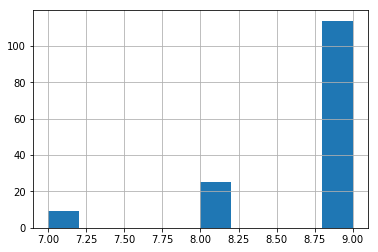

In [19]:
training_data_df[BEST_EPOCH].hist()

In [20]:
training_data_df[TOTAL_DURATION].describe()

count    148.000000
mean     584.452703
std       23.474790
min      568.000000
25%      573.000000
50%      577.500000
75%      585.000000
max      742.000000
Name: Total_Duration(s), dtype: float64

In [21]:
training_data_df.groupby([EXECUTION_NUMBER]).describe()[TEST_F1_MEASURE].sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Execution_Number,,,,,,,,
1,15.0,0.848587,0.013563,0.823806,0.839528,0.847882,0.858362,0.869453
4,15.0,0.848367,0.013220,0.821168,0.841081,0.847484,0.856543,0.869856
6,15.0,0.848332,0.014020,0.823284,0.838958,0.845876,0.860225,0.868401
3,15.0,0.848249,0.014453,0.823745,0.837642,0.844275,0.861123,0.868760
8,15.0,0.848171,0.012131,0.823929,0.838796,0.851272,0.854384,0.867575
7,15.0,0.847860,0.013099,0.820779,0.838840,0.847641,0.856141,0.868713
5,15.0,0.847327,0.014566,0.819937,0.838179,0.844206,0.857210,0.869253
9,15.0,0.847293,0.014072,0.821009,0.837762,0.843895,0.856113,0.871241
2,15.0,0.847273,0.014488,0.815260,0.839470,0.842839,0.857399,0.866718


In [22]:
rp.summary_cont(training_data_df[TEST_F1_MEASURE])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Test_F1_Measure,148.0,0.847558,0.013253,0.001089,0.845405,0.849711


In [23]:
rp.summary_cont(training_data_df.groupby(EMBEDDING))[TEST_F1_MEASURE]

,N,Mean,SD,SE,95% Conf.,Interval
Embedding,,,,,,
glove,59,0.839008,0.013860,0.001804,0.835472,0.842545
wang2vec,89,0.853226,0.009234,0.000979,0.851307,0.855144


In [24]:
# Calculating effect size
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

def print_anova(parameter):
    # Fits the model with the interaction term
    # This will also automatically include the main effects for each factor
    model = ols('Test_F1_Measure ~ C({0})'.format(parameter), training_data_df).fit()
    # Seeing if the overall model is significant
    print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .20f}")
    print(model.summary())
    res = sm.stats.anova_lm(model, typ= 2)
    print(res)
    print(anova_table(res))
    mc = statsmodels.stats.multicomp.MultiComparison(training_data_df[TEST_F1_MEASURE], training_data_df[parameter])
    mc_results = mc.tukeyhsd()
    print(mc_results)

In [25]:
print_anova(EMBEDDING_DIMENSION)

Overall model F( 5, 142) =  98.627, p =  0.00000000000000000000
                            OLS Regression Results                            
Dep. Variable:        Test_F1_Measure   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     98.63
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.05e-44
Time:                        07:46:12   Log-Likelihood:                 541.24
No. Observations:                 148   AIC:                            -1070.
Df Residuals:                     142   BIC:                            -1052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------